
# Project: Investigate a Dataset - [No Show Appointments ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment,, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, The Pandas library will be used to work with the data,
check for cleanliness, and then trim and clean your dataset for analysis.


In [3]:
# Load data and print out a few lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
boolean = df.duplicated().any()
print(boolean)

False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df.rename(columns={'No-show':'No_show'},inplace=True)

In [10]:
Noshow=df.No_show=='Yes'
df[Noshow].count()

PatientId         22319
AppointmentID     22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hipertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No_show           22319
dtype: int64

In [11]:
Show=df.No_show=='No'
df[Show].count()

PatientId         88208
AppointmentID     88208
Gender            88208
ScheduledDay      88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hipertension      88208
Diabetes          88208
Alcoholism        88208
Handcap           88208
SMS_received      88208
No_show           88208
dtype: int64

In [12]:
#df.No_show[df['No_show'] == 'Yes'] = '1'
#df.No_show[df['No_show'] == 'No'] = '0'
#df['No_show'] = pd.to_numeric(df['No_show'])

In [13]:
 #create a mask for people who came
#showed = df['No_show'] == 0
#not_showed = df['No_show'] == 1
#df['showed'] = showed
#df['not_showed'] = not_showed

In [14]:
df[df.Age == 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


In [15]:
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning


In [16]:
df[df.Age < 0]
df.drop(index=99832,inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No_show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [18]:
#Changing the AppointmentDay column into standard date format
df.AppointmentDay = pd.to_datetime(df['AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
#drop unnecessary columns
del_col=[ 'PatientId', 'AppointmentID', 'ScheduledDay']
df= df.drop(del_col,1)
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (What is the ratio between those who showed up and those who did not?)


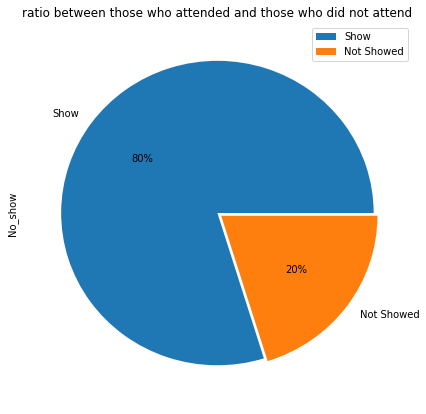

In [20]:
df["No_show"].value_counts().plot(kind="pie",labels=["Show","Not Showed"], explode=(0, .03),autopct='%1.0f%%',figsize=(7,7))
plt.title("ratio between those who attended and those who did not attend");
plt.legend();


### Research Question 2  (What is the ratio between the ages of the people who attended and those who were absent?)

attend in Appointments Mean Age: 37.790504154999034
Missed the Appointments Mean Age: 34.31766656212196


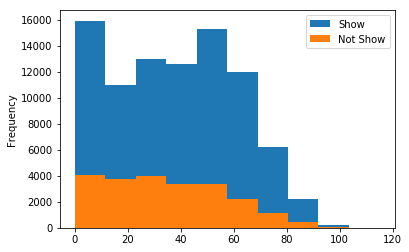

In [21]:
show = (df.No_show == 'No')
noshow = (df.No_show == 'Yes')
print('attend in Appointments Mean Age:',df[show].Age.mean())
print('Missed the Appointments Mean Age:',df[noshow].Age.mean())
df[show].Age.plot.hist()
df[noshow].Age.plot.hist()
plt.legend(['Show', 'Not Show'])
plt.show()


### Research Question 3 (Does diseases and age affect on the attendance?)

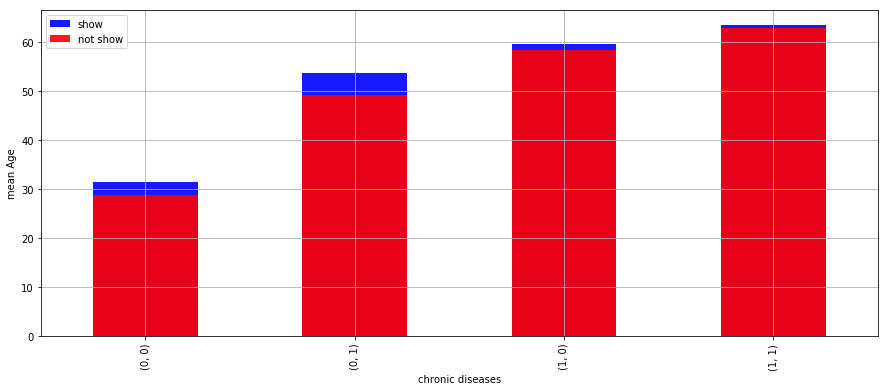

In [22]:
show = (df.No_show == 'No')
noshow = (df.No_show == 'Yes')
df['show']=show
df['noshow']=noshow
df[show].groupby ( ['Hipertension','Diabetes'] ).mean()['Age'].plot(color='blue',kind='bar', alpha= 0.9, figsize=(15, 6), label='show')
df[noshow].groupby ( ['Hipertension','Diabetes'] ).mean()['Age'].plot(color='red',kind='bar', alpha= 0.9, figsize=(15, 6), label='not show')
plt.legend()
plt.xlabel ("chronic diseases", fontsize=10) ;
plt.ylabel ("mean Age", fontsize=10) ;
plt.grid (True)

### Research Question 4 (What is the ratio between Male and Female?)

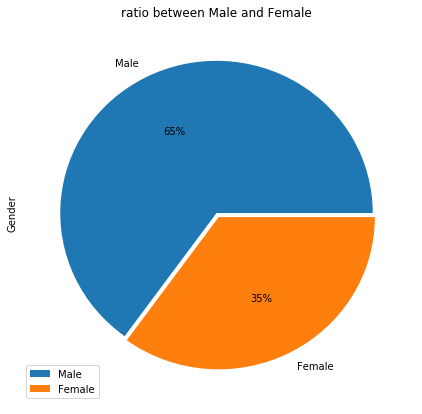

In [23]:

df["Gender"].value_counts().plot(kind="pie",labels=["Male","Female"], explode=(0, .03),autopct='%1.0f%%',figsize=(7,7))
plt.title("ratio between Male and Female");
plt.legend();

### Research Question 5 (What is the gender of the people who showed up at the appointed time?)

Gender
F    71839
M    38687
Name: show, dtype: int64


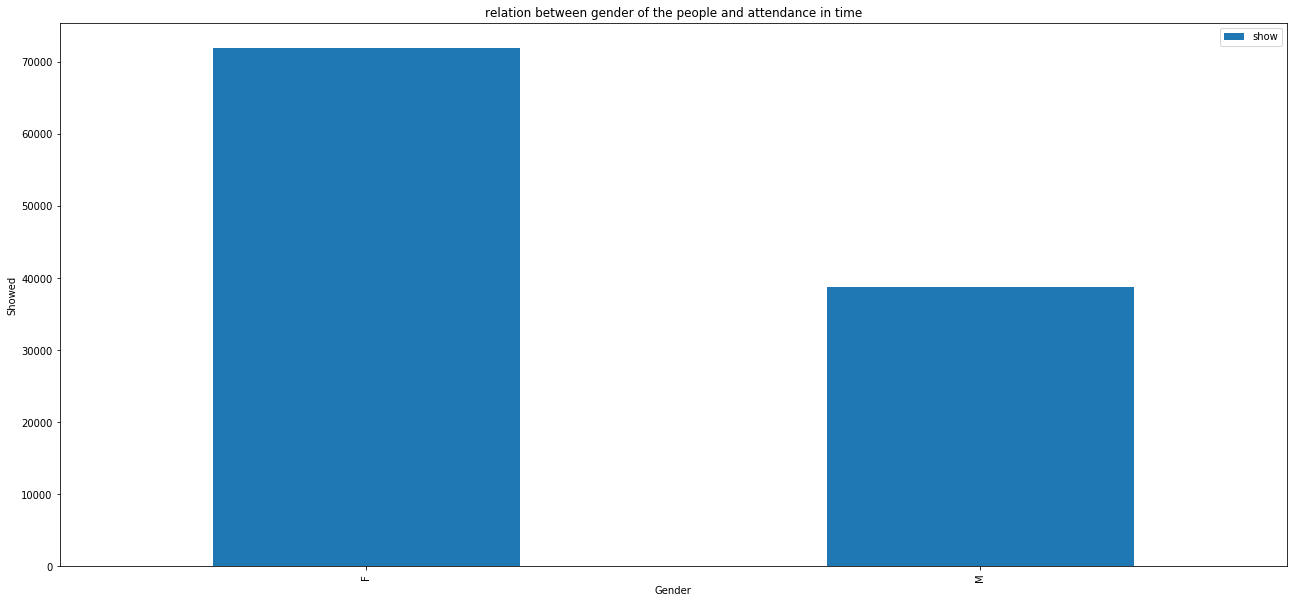

In [24]:
show = (df.No_show == 'No')
df['show']=show
print(df.groupby('Gender')['show'].count())
df.groupby('Gender')['show'].count().plot(kind='bar',figsize=(22,10));
plt.xlabel("Gender")
plt.ylabel("Showed")
plt.title("relation between gender of the people and attendance in time")
plt.legend()

### Research Question 6 (What is the gender of the people who not showed up at the appointed time?)


Gender
F    71839
M    38687
Name: noshow, dtype: int64


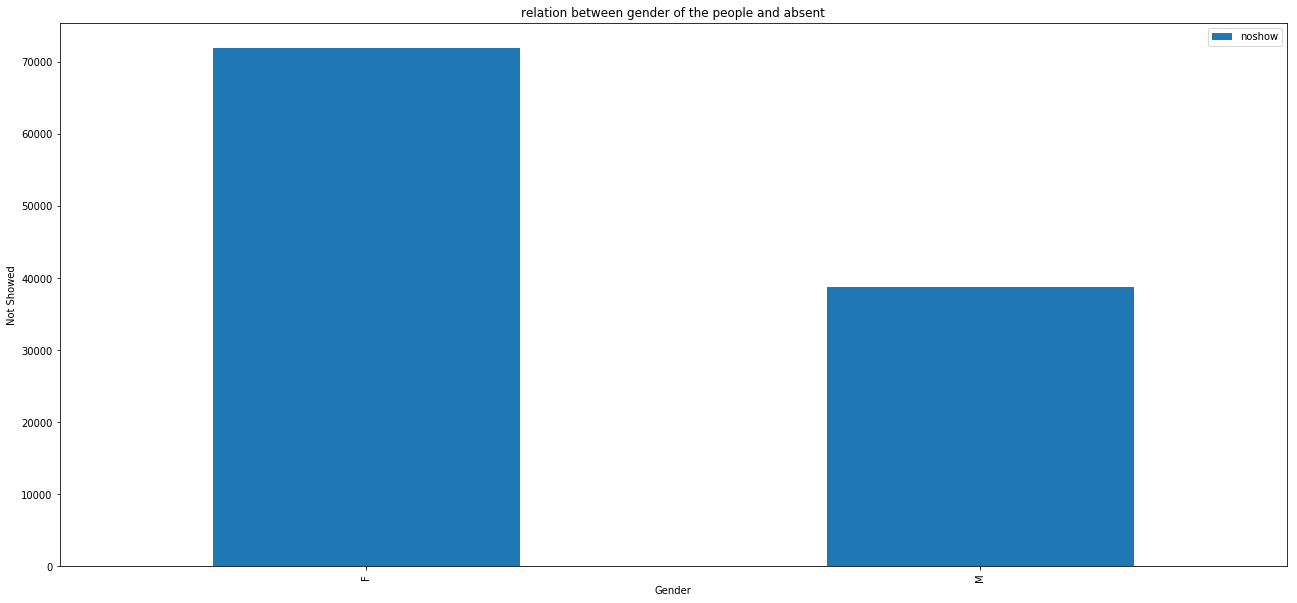

In [25]:
noshow = (df.No_show == 'Yes')
df['noshow']=noshow
print(df.groupby('Gender')['noshow'].count())
df.groupby('Gender')['noshow'].count().plot(kind='bar',figsize=(22,10));
plt.xlabel("Gender")
plt.ylabel("Not Showed")
plt.title("relation between gender of the people and absent")
plt.legend()

### Research Question 7 (What is the day when the largest number of people attended?)


In [26]:
# takes a datetime (AppointmentDay) and extracts the name of weekday
df['DayOfWeek'] = df.AppointmentDay.apply(lambda dt: dt.weekday_name)
df.DayOfWeek.value_counts().to_frame(name='Number of Appointments')

,Number of Appointments
Wednesday,25867
Tuesday,25640
Monday,22714
Friday,19019
Thursday,17247
Saturday,39


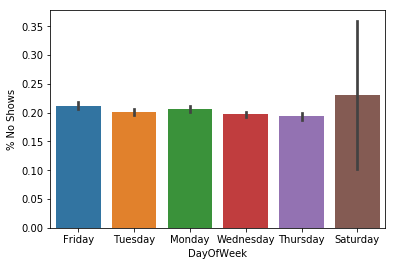

In [27]:
show=(df.No_show == 'Yes')
df['show']=show
ax = sns.barplot(x=df.DayOfWeek, y=df.show)
ax.set(ylabel='% No Shows')
plt.show()

### Research Question 8  (What are The ratio between the SMS_received and the people who attended?)

SMS_received
0    75044
1    35482
Name: show, dtype: int64


Text(0.5,1,'relation between SMS_recievers and patients who showed')

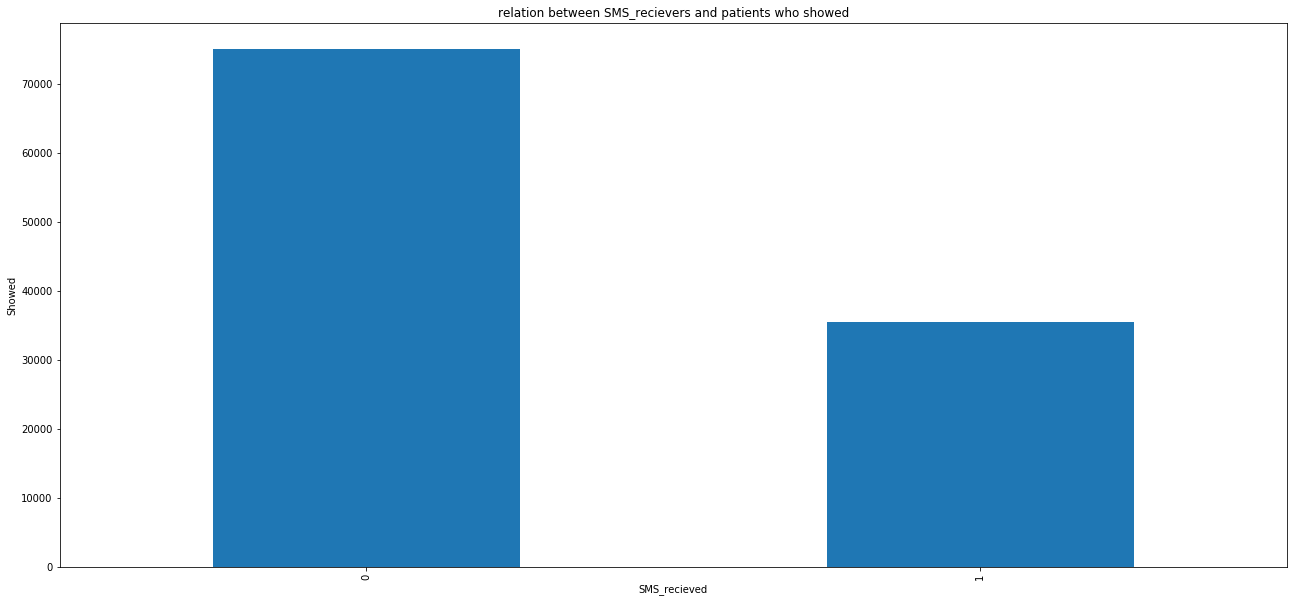

In [28]:
show = (df.No_show == 'No')
df['show']=show
print(df.groupby('SMS_received')['show'].count())
df.groupby('SMS_received')['show'].count().plot(kind='bar',figsize=(22,10));
plt.xlabel("SMS_recieved")
plt.ylabel("Showed")
plt.title("relation between SMS_recievers and patients who showed")

### Research Question 9 (What are The ratio between the SMS_received and the people who absent?)

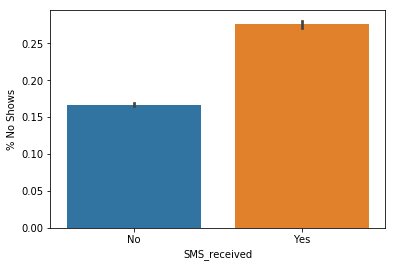

In [29]:
noshow = (df.No_show == 'Yes')
df['noshow']=noshow
yes_no = {1:'Yes', 0:'No'}

# bar plot the percentage of noshows for each sms condition
ax = sns.barplot(x=df.SMS_received.map(yes_no), y=df.noshow)
ax.set_ylabel('% No Shows')
plt.show()


### Research Question 10  (What is the ratio between the neighborhood that achieved the largest attendance rate and the one who did not attend?)


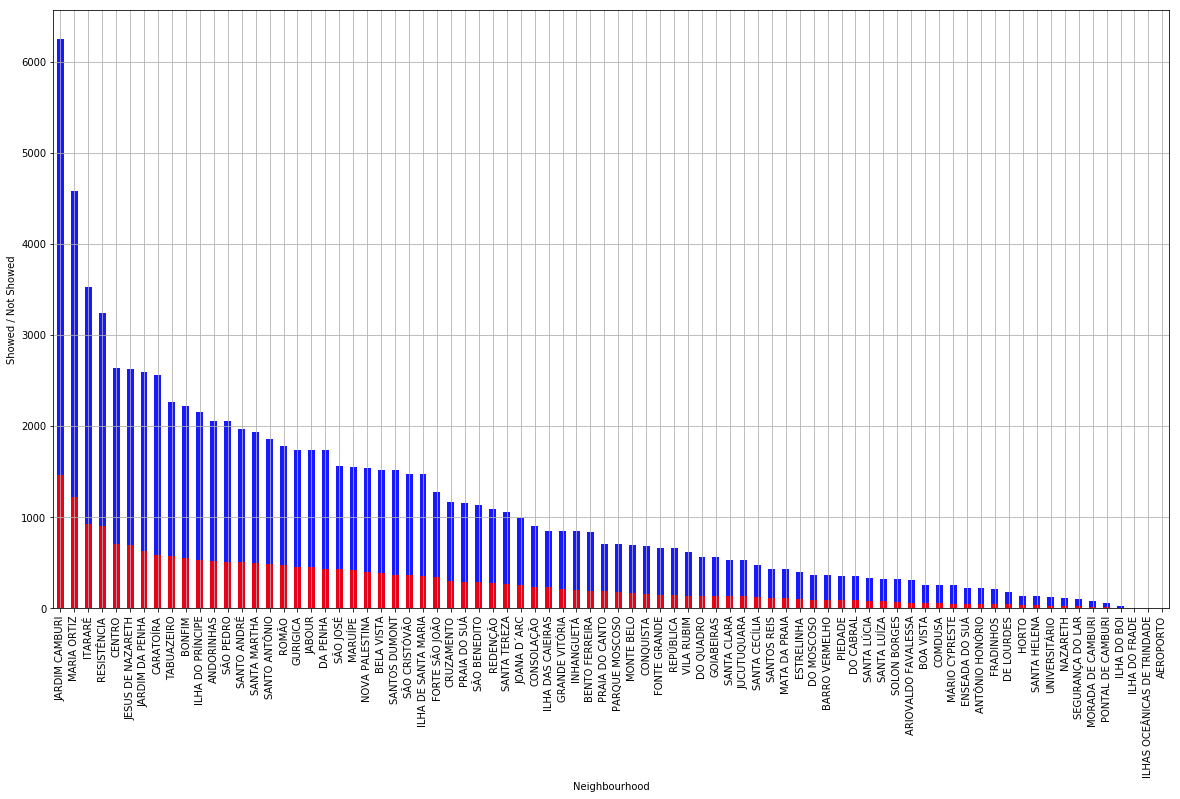

In [30]:
show = (df.No_show == 'No')
noshow = (df.No_show == 'Yes')
df['show']=show
df['noshow']=noshow
df.Neighbourhood[show].value_counts().plot(color='blue',kind='bar',alpha= 0.9, figsize=(20, 11), label='show')
df.Neighbourhood[noshow].value_counts().plot(color='red',kind='bar', alpha= 0.9, figsize=(20, 11), label='show')
plt.xlabel ("Neighbourhood", fontsize=10) ;
plt.ylabel ("Showed / Not Showed", fontsize=10) ;
plt.grid (True)

<a id='conclusions'></a>
## Conclusions

>  Most of those interested in attending are less than 20 years old and the least people are 80 and over, Age is the most important factor that decided if a patient would come or not 

> Gender does not affect attendance, it is not relevant

> It is clear that attention must be paid to the messages sent to patients to set the appointment, confirm and follow up

> The presence or absence of the disease does not affect the presence or absence of the patient

>Neighbourhood affects the patient's presence and absence


In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0